<a href="https://colab.research.google.com/github/tlacloc/analisis-defunciones-nacimientos-2022/blob/main/Analisis_Nacimientos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [108]:
# Libreria para cargar nuestro drive
from google.colab import drive

# Cargamos nuestro drive en nuestro notebook
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [109]:
!ls "/content/drive/MyDrive/Colab Notebooks"

'Copy of SDC11_actividad1_Badillo_Casanova.ipynb'   SDC_12		 test.ipynb
'EVC Hackathon Files'				    SDC_13		 Untitled0.ipynb
 Image						    SDC_14		 Untitled1.ipynb
 miriam						    SDC_15		 Vero
 SCD_12_Erick_Casanova.ipynb			    test-forvero.ipynb	 Visualizacion


In [110]:
# Librerias de ayuda
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import seaborn as sns

In [111]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/miriam/nacimientos_2022.csv', low_memory=False)
df.head(10)

,NACIOEXTRANJERO,ENTIDADNACIMIENTO,MUNICIPIONACIMIENTO,EDAD,SECONSIDERAINDIGENA,HABLALENGUAINDIGENA,FECHANACIMIENTOMADRE,ESTADOCONYUGAL,RESIDEEXTRANJERO,ENTIDADRESIDENCIA,...,TIPOMEDICOATENDIO,ENTIDADFEDERATIVAPARTO,MUNICIPIOPARTO,LOCALIDADPARTO,CERTIFICADOPOR,CLUESCERTIFICA,ENTIDADFEDERATIVACERTIFICA,MUNICIPIOCERTIFICA,LOCALIDADCERTIFICA,FECHACERTIFICADO
0,1,88,997,28,1,1,09/06/1993,5,2,23,...,11.0,23,8,1,1,QRSSA018001,23,8,1,08/02/2022
1,1,88,997,32,2,2,13/01/1990,5,2,23,...,11.0,23,8,1,1,QRSSA018001,23,8,1,09/02/2022
2,1,88,997,34,2,2,18/01/1988,1,2,23,...,11.0,23,8,1,1,QRSSA018001,23,8,1,04/02/2022
3,2,7,65,27,1,1,01/09/1994,1,2,23,...,11.0,23,8,1,1,QRSSA018001,23,8,1,09/02/2022
4,2,23,4,19,1,2,10/05/2002,1,2,23,...,11.0,23,8,1,1,QRSSA018001,23,8,1,09/02/2022
5,2,23,2,21,1,1,01/05/2000,1,2,23,...,11.0,23,8,1,1,QRSSA018001,23,8,1,02/02/2022
6,2,23,2,38,1,1,24/06/1983,1,2,23,...,11.0,23,8,1,1,QRSSA018001,23,8,1,24/01/2022
7,2,23,8,21,2,2,24/03/2000,1,2,23,...,11.0,23,8,1,1,QRSSA018001,23,8,1,24/01/2022
8,2,9,10,33,2,2,17/05/1988,5,2,9,...,11.0,9,15,1,1,DFSSA003990,9,15,1,30/01/2022
9,2,9,12,42,2,2,16/12/1979,1,2,9,...,11.0,9,14,1,1,DFIST000312,9,14,1,10/02/2022


In [112]:
oldColumns = df.columns
oldColumns

Index(['NACIOEXTRANJERO', 'ENTIDADNACIMIENTO', 'MUNICIPIONACIMIENTO', 'EDAD',
       'SECONSIDERAINDIGENA', 'HABLALENGUAINDIGENA', 'FECHANACIMIENTOMADRE',
       'ESTADOCONYUGAL', 'RESIDEEXTRANJERO', 'ENTIDADRESIDENCIA',
       'MUNICIPIORESIDENCIA', 'LOCALIDADRESIDENCIA', 'NUMEROEMBARAZOS',
       'HIJOSNACIDOSMUERTOS', 'HIJOSNACIDOSVIVOS', 'HIJOSSOBREVIVIENTES',
       'CONDICIONHIJOANTERIOR', 'VIVEHIJOANTERIOR', 'ORDENNACIMIENTO',
       'ATENCIONPRENATAL', 'TRIMESTREPRIMERCONSULTA', 'TOTALCONSULTAS',
       'SOBREVIVIOPARTO', 'AFILIACION', 'ESCOLARIDAD', 'INTERRUMPIOESTUDIOS',
       'CLAVEOCUPACIONHABITUAL', 'TRABAJAACTUALMENTE', 'EDADPADRE',
       'FECHANACIMIENTO', 'HORANACIMIENTO', 'SEXO', 'EDADGESTACIONAL', 'TALLA',
       'PESO', 'APGAR', 'SILVERMAN', 'TAMIZAUDITIVO', 'VACUNA_BCG',
       'VACUNAHEPATITIS_B', 'VITAMINA_A', 'VITAMINA_K', 'PRODUCTOEMBARAZO',
       'ORDENPRODUCTO', 'TOTALPRODUCTOS', 'CODIGOCIEANOMALIA1',
       'CODIGOCIEANOMALIA2', 'LUGARNACIMIENTO', 'CLUES',

Variables que sd van a utilizar

In [113]:
# Limpieza de datos
# Se eliminaran las columnas que no se utilizaran

columnsToRemove = [
    "TAMIZAUDITIVO",
    "HIJOSSOBREVIVIENTES",
    "FECHANACIMIENTO",
    "ORDENPRODUCTO",
  "NACIOEXTRANJERO",
  "ENTIDADNACIMIENTO",
  "MUNICIPIONACIMIENTO",
  "SECONSIDERAINDIGENA",
  "HABLALENGUAINDIGENA",
  "FECHANACIMIENTOMADRE",
  "RESIDEEXTRANJERO",
  "ESTADOCONYUGAL",
  "ENTIDADRESIDENCIA",
  "MUNICIPIORESIDENCIA",
  "LOCALIDADRESIDENCIA",
  "HIJOSNACIDOSVIVOS",
  "CONDICIONHIJOANTERIOR",
  "VIVEHIJOANTERIOR",
  "ORDENNACIMIENTO",
  "AFILIACION",
  "INTERRUMPIOESTUDIOS",
  "CLAVEOCUPACIONHABITUAL",
  "TRABAJAACTUALMENTE",
  "HORANACIMIENTO",
  "VACUNA_BCG",
  "VACUNAHEPATITIS_B",
  "VITAMINA_A",
  "VITAMINA_K",
  # Relacionado a gemelos
  # "PRODUCTOEMBARAZO",
  "ORDENPRODUCTO",
  # "TOTALPRODUCTOS",
  "CLUES",
  "TIEMPOTRASLADO",
  # "RESOLUCIONEMBARAZO",
  # "UTILIZOFORCEPS",
  "TIPOCESAREA",
  "PERSONALATENDIO",
  "TIPOMEDICOATENDIO",
  "MUNICIPIOPARTO",
  "LOCALIDADPARTO",
  "CERTIFICADOPOR",
  "CLUESCERTIFICA",
  "ENTIDADFEDERATIVACERTIFICA",
  "MUNICIPIOCERTIFICA",
  "LOCALIDADCERTIFICA",
  "FECHACERTIFICADO",
  "LUGARNACIMIENTO"
]

df.drop(columnsToRemove, inplace=True, axis=1)

In [114]:
columnsToReview = df.columns
columnsToReview

Index(['EDAD', 'NUMEROEMBARAZOS', 'HIJOSNACIDOSMUERTOS', 'ATENCIONPRENATAL',
       'TRIMESTREPRIMERCONSULTA', 'TOTALCONSULTAS', 'SOBREVIVIOPARTO',
       'ESCOLARIDAD', 'EDADPADRE', 'SEXO', 'EDADGESTACIONAL', 'TALLA', 'PESO',
       'APGAR', 'SILVERMAN', 'PRODUCTOEMBARAZO', 'TOTALPRODUCTOS',
       'CODIGOCIEANOMALIA1', 'CODIGOCIEANOMALIA2', 'RESOLUCIONEMBARAZO',
       'UTILIZOFORCEPS', 'ENTIDADFEDERATIVAPARTO'],
      dtype='object')

In [115]:
#df=df.drop(df[df['EDAD']==999].index)
#df=df.drop(df[df['EDAD']==888].index)
#df=df.drop(df[df['NUMEROEMBARAZOS']==99].index)
#df=df.drop(df[df['HIJOSNACIDOSMUERTOS']==99].index)
#df=df.drop(df[df['ATENCIONPRENATAL']==9].index)
#df=df.drop(df[df['TRIMESTREPRIMERCONSULTA']==9].index)
#df=df.drop(df[df['TOTALCONSULTAS']==99].index)
#df=df.drop(df[df['SOBREVIVIOPARTO']==9].index)
#df=df.drop(df[df['ESCOLARIDAD']==999].index)
#df=df.drop(df[df['EDADPADRE']==999].index)
#df=df.drop(df[df['SEXO']==99].index)
#df=df.drop(df[df['EDADGESTACIONAL']==99].index)
#df=df.drop(df[df['TALLA']==99].index)
#df=df.drop(df[df['PESO']==9999].index)
#df=df.drop(df[df['TALLA']==9].index)
#df=df.drop(df[df['APGAR']==99].index)
#df=df.drop(df[df['SILVERMAN']==99].index)
#df=df.drop(df[df['UTILIZOFORCEPS']==9].index)

In [116]:
df.head(10)

,EDAD,NUMEROEMBARAZOS,HIJOSNACIDOSMUERTOS,ATENCIONPRENATAL,TRIMESTREPRIMERCONSULTA,TOTALCONSULTAS,SOBREVIVIOPARTO,ESCOLARIDAD,EDADPADRE,SEXO,...,PESO,APGAR,SILVERMAN,PRODUCTOEMBARAZO,TOTALPRODUCTOS,CODIGOCIEANOMALIA1,CODIGOCIEANOMALIA2,RESOLUCIONEMBARAZO,UTILIZOFORCEPS,ENTIDADFEDERATIVAPARTO
0,28,3,0,1,2,10.0,1,31,NaN,2,...,3495,9,0,1,NaN,0000,0000,1,8,23
1,32,5,1,1,1,8.0,1,52,NaN,1,...,1660,9,0,1,NaN,P071,0000,1,8,23
2,34,3,0,1,1,9.0,1,71,NaN,1,...,3100,9,0,1,NaN,0000,0000,1,8,23
3,27,2,1,1,1,7.0,1,51,NaN,2,...,2850,9,0,1,NaN,0000,0000,3,8,23
4,19,1,0,1,1,12.0,1,71,NaN,2,...,3535,9,0,1,NaN,0000,0000,3,8,23
5,21,1,0,1,1,9.0,1,51,NaN,2,...,3550,9,0,1,NaN,0000,0000,1,8,23
6,38,8,0,2,0,0.0,1,31,NaN,1,...,3155,9,0,1,NaN,0000,0000,1,8,23
7,21,2,0,1,2,4.0,1,82,NaN,2,...,3420,9,0,1,NaN,0000,0000,3,8,23
8,33,2,0,1,1,6.0,1,72,NaN,1,...,3400,9,0,1,NaN,Q699,0000,1,8,9
9,42,1,0,1,1,16.0,1,81,NaN,1,...,3052,9,0,1,NaN,0000,0000,3,8,9


Variable: presencia o ausencia de Malformaciones Craneofaciales MCF

In [117]:
def update_codes(base_array):
  new_codes = []
  for value in base_array:
    for i in range(0, 10):
      new_codes.append(value[:-1] + str(i))

  return new_codes

In [118]:
codigos_mc = update_codes(['Q100', 'Q110', 'Q120', 'Q130', 'Q140', 'Q150', 'Q160', 'Q170', 'Q180', 'Q300', 'Q350', 'Q360', 'Q370', 'Q380'])
anomalias_mc = df['CODIGOCIEANOMALIA1'].isin(codigos_mc) | df['CODIGOCIEANOMALIA2'].isin(codigos_mc)
mc_df = df[anomalias_mc]
mc_df

,EDAD,NUMEROEMBARAZOS,HIJOSNACIDOSMUERTOS,ATENCIONPRENATAL,TRIMESTREPRIMERCONSULTA,TOTALCONSULTAS,SOBREVIVIOPARTO,ESCOLARIDAD,EDADPADRE,SEXO,...,PESO,APGAR,SILVERMAN,PRODUCTOEMBARAZO,TOTALPRODUCTOS,CODIGOCIEANOMALIA1,CODIGOCIEANOMALIA2,RESOLUCIONEMBARAZO,UTILIZOFORCEPS,ENTIDADFEDERATIVAPARTO
16,37,1,0,1,1,15.0,1,101,NaN,1,...,2420,9,0,1,NaN,Q374,Q213,3,8,9
378,32,2,0,1,1,9.0,1,31,NaN,1,...,9999,8,9,1,NaN,Q184,P221,3,8,23
508,37,4,0,1,1,6.0,1,81,NaN,2,...,9999,9,0,1,NaN,Q374,0000,3,8,9
752,38,2,0,1,3,2.0,1,51,NaN,1,...,2855,9,2,1,NaN,Q172,Q172,3,8,9
946,23,3,1,1,2,6.0,1,52,NaN,2,...,9999,9,0,1,NaN,Q255,Q359,1,8,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1621276,30,3,0,1,1,10.0,1,31,34.0,2,...,2630,9,1,1,NaN,Q381,0000,3,8,22
1621303,23,1,0,1,2,6.0,1,51,25.0,1,...,2700,9,0,1,NaN,Q160,Q160,1,8,30
1621745,33,2,0,1,1,6.0,1,31,39.0,2,...,3290,9,1,1,NaN,Q178,0000,3,8,11
1622186,27,2,1,1,1,5.0,1,51,26.0,1,...,4058,9,0,1,NaN,Q360,Q369,3,8,6


In [119]:
ttest_ind(df['APGAR'], df['SILVERMAN'])

TtestResult(statistic=1017.8859859689841, pvalue=0.0, df=3245840.0)

## Variable categórica clasificación de MCF
- Oftalmológicas Q100 Q110 Q120 Q130 Q140 Q150
- Oído Q160 Q170
- Cara y cuello Q180
- Nariz Q300
- Lengua y boca Q380 Q350 Q360 Q370

### Oftalmo

In [120]:
# Valores par oftalmo
codigos_oftalmo = update_codes(['Q100', 'Q110', 'Q120', 'Q130', 'Q140', 'Q150'])
anomalias_oftalmo = df['CODIGOCIEANOMALIA1'].isin(codigos_oftalmo) | df['CODIGOCIEANOMALIA2'].isin(codigos_oftalmo)
anomalias_oftalmo_df = df[anomalias_oftalmo]
anomalias_oftalmo_df

,EDAD,NUMEROEMBARAZOS,HIJOSNACIDOSMUERTOS,ATENCIONPRENATAL,TRIMESTREPRIMERCONSULTA,TOTALCONSULTAS,SOBREVIVIOPARTO,ESCOLARIDAD,EDADPADRE,SEXO,...,PESO,APGAR,SILVERMAN,PRODUCTOEMBARAZO,TOTALPRODUCTOS,CODIGOCIEANOMALIA1,CODIGOCIEANOMALIA2,RESOLUCIONEMBARAZO,UTILIZOFORCEPS,ENTIDADFEDERATIVAPARTO
50004,35,2,0,1,1,10.0,1,81,32.0,1,...,2720,10,0,1,NaN,Q139,0000,3,8,19
51637,19,1,0,1,1,15.0,1,51,24.0,1,...,3580,9,3,1,NaN,P369,Q106,1,8,26
52452,22,2,0,1,2,6.0,1,51,49.0,2,...,2530,9,0,1,NaN,Q106,Q106,1,8,22
52532,30,2,0,1,1,6.0,1,81,30.0,2,...,3010,9,0,1,NaN,Q112,0000,3,8,9
84499,28,3,0,1,1,10.0,1,81,28.0,2,...,2885,9,0,1,NaN,P011,Q103,3,8,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1537051,16,1,0,1,1,3.0,1,51,NaN,2,...,2900,9,0,1,NaN,Q103,0000,1,8,1
1552832,32,1,0,1,1,9.0,1,71,30.0,1,...,2280,9,2,1,NaN,Q120,0000,3,8,21
1560570,19,1,0,1,2,10.0,1,71,20.0,2,...,9999,8,0,1,NaN,P051,Q138,3,8,1
1580278,17,2,1,1,1,4.0,1,72,21.0,2,...,9999,2,0,1,NaN,P072,Q158,1,8,5


### Oido

In [121]:
# Valores par oido
codigos_oido = update_codes(['Q160', 'Q170'])
anomalias_oido = df['CODIGOCIEANOMALIA1'].isin(codigos_oido) | df['CODIGOCIEANOMALIA2'].isin(codigos_oido)
anomalias_oido_df = df[anomalias_oido]
anomalias_oido_df

,EDAD,NUMEROEMBARAZOS,HIJOSNACIDOSMUERTOS,ATENCIONPRENATAL,TRIMESTREPRIMERCONSULTA,TOTALCONSULTAS,SOBREVIVIOPARTO,ESCOLARIDAD,EDADPADRE,SEXO,...,PESO,APGAR,SILVERMAN,PRODUCTOEMBARAZO,TOTALPRODUCTOS,CODIGOCIEANOMALIA1,CODIGOCIEANOMALIA2,RESOLUCIONEMBARAZO,UTILIZOFORCEPS,ENTIDADFEDERATIVAPARTO
752,38,2,0,1,3,2.0,1,51,NaN,1,...,2855,9,2,1,NaN,Q172,Q172,3,8,9
3367,15,1,0,1,1,4.0,1,31,NaN,2,...,2810,9,0,1,NaN,Q170,0000,1,8,14
3855,17,1,0,1,2,5.0,1,31,NaN,2,...,3735,9,0,1,NaN,Q172,0000,3,8,23
6499,23,3,0,1,1,8.0,1,71,NaN,1,...,3340,9,0,1,NaN,Q169,0000,1,8,14
7582,24,1,0,1,2,7.0,1,51,26.0,2,...,3810,8,0,1,NaN,Q172,P702,2,2,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1609639,38,2,0,1,1,11.0,1,51,36.0,1,...,3490,9,1,1,NaN,Q170,Q170,3,8,25
1617694,16,1,0,1,1,6.0,1,51,18.0,2,...,3200,9,0,1,NaN,Q173,Q795,1,8,9
1617847,22,1,0,1,1,9.0,1,81,29.0,2,...,2580,9,0,1,NaN,Q170,0000,3,8,9
1621303,23,1,0,1,2,6.0,1,51,25.0,1,...,2700,9,0,1,NaN,Q160,Q160,1,8,30


### Cara y cuello

In [122]:
# Valores par cara y cuello
codigos_cara_cuello = update_codes(['Q180'])
anomalias_cara_cuello = df['CODIGOCIEANOMALIA1'].isin(codigos_cara_cuello) | df['CODIGOCIEANOMALIA2'].isin(codigos_cara_cuello)
anomalias_cara_cuello_df = df[anomalias_cara_cuello]
anomalias_cara_cuello_df

,EDAD,NUMEROEMBARAZOS,HIJOSNACIDOSMUERTOS,ATENCIONPRENATAL,TRIMESTREPRIMERCONSULTA,TOTALCONSULTAS,SOBREVIVIOPARTO,ESCOLARIDAD,EDADPADRE,SEXO,...,PESO,APGAR,SILVERMAN,PRODUCTOEMBARAZO,TOTALPRODUCTOS,CODIGOCIEANOMALIA1,CODIGOCIEANOMALIA2,RESOLUCIONEMBARAZO,UTILIZOFORCEPS,ENTIDADFEDERATIVAPARTO
378,32,2,0,1,1,9.0,1,31,NaN,1,...,9999,8,9,1,NaN,Q184,P221,3,8,23
3447,17,2,0,2,0,0.0,1,32,17.0,2,...,3080,8,9,1,NaN,Q180,0000,1,8,8
9213,33,2,1,1,1,9.0,1,81,38.0,1,...,1790,9,1,1,NaN,Q181,0000,3,8,31
22635,22,3,0,1,1,6.0,1,31,28.0,1,...,3925,9,0,1,NaN,Q181,0000,1,8,30
30870,38,1,0,1,1,15.0,1,51,99.0,1,...,3720,9,0,1,NaN,Q181,0000,3,8,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1596730,18,1,0,1,1,4.0,1,71,24.0,2,...,2820,9,1,1,NaN,Q174,Q189,3,8,9
1597517,16,2,1,1,1,6.0,1,31,19.0,1,...,2825,9,0,1,NaN,Q172,Q181,3,8,1
1599717,26,1,0,1,2,10.0,1,81,27.0,2,...,2625,9,0,1,NaN,Q182,0000,3,8,30
1603248,24,1,0,1,1,8.0,1,72,25.0,2,...,2623,9,4,1,NaN,Q181,Q170,3,8,6


### Nariz

In [123]:
# Valores para nariz
codigos_nariz = update_codes(['Q300'])
anomalias_nariz = df['CODIGOCIEANOMALIA1'].isin(codigos_nariz) | df['CODIGOCIEANOMALIA2'].isin(codigos_nariz)
anomalias_nariz_df = df[anomalias_nariz]
anomalias_nariz_df

,EDAD,NUMEROEMBARAZOS,HIJOSNACIDOSMUERTOS,ATENCIONPRENATAL,TRIMESTREPRIMERCONSULTA,TOTALCONSULTAS,SOBREVIVIOPARTO,ESCOLARIDAD,EDADPADRE,SEXO,...,PESO,APGAR,SILVERMAN,PRODUCTOEMBARAZO,TOTALPRODUCTOS,CODIGOCIEANOMALIA1,CODIGOCIEANOMALIA2,RESOLUCIONEMBARAZO,UTILIZOFORCEPS,ENTIDADFEDERATIVAPARTO
1095,42,1,0,1,1,10.0,1,71,NaN,2,...,9999,9,3,1,NaN,Q302,Q390,1,8,9
16143,31,1,0,1,1,7.0,1,31,32.0,2,...,2770,9,0,1,NaN,Q308,Q385,3,8,21
18966,23,3,0,1,8,6.0,1,71,27.0,2,...,2440,9,0,1,NaN,Q309,0000,1,8,14
26253,27,3,0,1,1,10.0,1,51,32.0,2,...,3500,9,0,1,NaN,Q309,0000,3,8,1
41415,19,1,0,1,2,5.0,1,71,20.0,2,...,3100,9,0,1,NaN,Q309,0000,3,8,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1569204,26,1,0,1,1,10.0,1,51,32.0,2,...,2450,9,2,1,NaN,Q309,Q309,3,8,15
1577317,21,1,0,1,1,5.0,1,71,22.0,2,...,9999,9,0,1,NaN,Q309,0000,3,8,17
1582669,23,2,1,1,1,9.0,1,71,21.0,2,...,3245,9,1,1,NaN,Q309,Q309,3,8,22
1598109,27,1,0,1,1,5.0,1,51,35.0,2,...,2588,9,1,1,NaN,Q379,Q309,1,8,30


### Lengua y boca

In [124]:
# Valores para lengua y boca
codigos_lengua_boca = update_codes(['Q380', 'Q350', 'Q360', 'Q370'])
anomalias_lengua_boca = df['CODIGOCIEANOMALIA1'].isin(codigos_lengua_boca) | df['CODIGOCIEANOMALIA2'].isin(codigos_lengua_boca)
anomalias_lengua_boca_df = df[anomalias_lengua_boca]
anomalias_lengua_boca_df

,EDAD,NUMEROEMBARAZOS,HIJOSNACIDOSMUERTOS,ATENCIONPRENATAL,TRIMESTREPRIMERCONSULTA,TOTALCONSULTAS,SOBREVIVIOPARTO,ESCOLARIDAD,EDADPADRE,SEXO,...,PESO,APGAR,SILVERMAN,PRODUCTOEMBARAZO,TOTALPRODUCTOS,CODIGOCIEANOMALIA1,CODIGOCIEANOMALIA2,RESOLUCIONEMBARAZO,UTILIZOFORCEPS,ENTIDADFEDERATIVAPARTO
16,37,1,0,1,1,15.0,1,101,NaN,1,...,2420,9,0,1,NaN,Q374,Q213,3,8,9
508,37,4,0,1,1,6.0,1,81,NaN,2,...,9999,9,0,1,NaN,Q374,0000,3,8,9
946,23,3,1,1,2,6.0,1,52,NaN,2,...,9999,9,0,1,NaN,Q255,Q359,1,8,23
2667,19,2,1,1,1,6.0,1,71,37.0,2,...,2970,9,0,1,NaN,Q375,0000,1,8,14
2902,33,3,0,1,1,7.0,1,51,36.0,2,...,1920,10,0,1,NaN,Q371,0000,3,8,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1620331,43,3,0,1,1,13.0,1,81,41.0,1,...,3168,9,2,1,NaN,Q374,0000,3,8,9
1621238,27,3,0,1,3,5.0,1,51,26.0,2,...,2200,9,0,1,NaN,Q000,Q379,3,8,15
1621276,30,3,0,1,1,10.0,1,31,34.0,2,...,2630,9,1,1,NaN,Q381,0000,3,8,22
1622186,27,2,1,1,1,5.0,1,51,26.0,1,...,4058,9,0,1,NaN,Q360,Q369,3,8,6


# PX sanos

los sanos son los que no tienen nada o 0000 en anomalia 1 o 2

In [125]:
nmc = (df['CODIGOCIEANOMALIA1'] == '0000') & (df['CODIGOCIEANOMALIA2'] == '0000')
nmc_df = df[nmc]
nmc_df

,EDAD,NUMEROEMBARAZOS,HIJOSNACIDOSMUERTOS,ATENCIONPRENATAL,TRIMESTREPRIMERCONSULTA,TOTALCONSULTAS,SOBREVIVIOPARTO,ESCOLARIDAD,EDADPADRE,SEXO,...,PESO,APGAR,SILVERMAN,PRODUCTOEMBARAZO,TOTALPRODUCTOS,CODIGOCIEANOMALIA1,CODIGOCIEANOMALIA2,RESOLUCIONEMBARAZO,UTILIZOFORCEPS,ENTIDADFEDERATIVAPARTO
0,28,3,0,1,2,10.0,1,31,NaN,2,...,3495,9,0,1,NaN,0000,0000,1,8,23
2,34,3,0,1,1,9.0,1,71,NaN,1,...,3100,9,0,1,NaN,0000,0000,1,8,23
3,27,2,1,1,1,7.0,1,51,NaN,2,...,2850,9,0,1,NaN,0000,0000,3,8,23
4,19,1,0,1,1,12.0,1,71,NaN,2,...,3535,9,0,1,NaN,0000,0000,3,8,23
5,21,1,0,1,1,9.0,1,51,NaN,2,...,3550,9,0,1,NaN,0000,0000,1,8,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1622916,29,3,0,1,1,5.0,1,51,28.0,2,...,3000,9,0,1,NaN,0000,0000,1,8,30
1622917,35,5,0,1,1,4.0,1,31,34.0,1,...,740,8,2,2,2.0,0000,0000,1,8,25
1622918,16,1,0,1,1,6.0,1,52,17.0,1,...,2850,9,0,1,NaN,0000,0000,3,8,5
1622919,29,7,2,1,1,6.0,1,51,29.0,1,...,2750,9,0,1,NaN,0000,0000,3,8,2


### Variable segunda malformacion

In [126]:
codigos_mc
primer_anomalia_mc = df['CODIGOCIEANOMALIA1'].isin(codigos_mc) & (df['CODIGOCIEANOMALIA2'] == '0000')
primer_anomalia_mc_df = df[primer_anomalia_mc]
primer_anomalia_mc_df

,EDAD,NUMEROEMBARAZOS,HIJOSNACIDOSMUERTOS,ATENCIONPRENATAL,TRIMESTREPRIMERCONSULTA,TOTALCONSULTAS,SOBREVIVIOPARTO,ESCOLARIDAD,EDADPADRE,SEXO,...,PESO,APGAR,SILVERMAN,PRODUCTOEMBARAZO,TOTALPRODUCTOS,CODIGOCIEANOMALIA1,CODIGOCIEANOMALIA2,RESOLUCIONEMBARAZO,UTILIZOFORCEPS,ENTIDADFEDERATIVAPARTO
508,37,4,0,1,1,6.0,1,81,NaN,2,...,9999,9,0,1,NaN,Q374,0000,3,8,9
2667,19,2,1,1,1,6.0,1,71,37.0,2,...,2970,9,0,1,NaN,Q375,0000,1,8,14
2902,33,3,0,1,1,7.0,1,51,36.0,2,...,1920,10,0,1,NaN,Q371,0000,3,8,19
2981,25,3,0,1,1,8.0,1,51,40.0,1,...,2690,9,0,1,NaN,Q381,0000,1,8,14
3367,15,1,0,1,1,4.0,1,31,NaN,2,...,2810,9,0,1,NaN,Q170,0000,1,8,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1616988,18,2,0,1,2,2.0,1,52,99.0,2,...,3660,9,1,1,NaN,Q381,0000,1,8,2
1617847,22,1,0,1,1,9.0,1,81,29.0,2,...,2580,9,0,1,NaN,Q170,0000,3,8,9
1620331,43,3,0,1,1,13.0,1,81,41.0,1,...,3168,9,2,1,NaN,Q374,0000,3,8,9
1621276,30,3,0,1,1,10.0,1,31,34.0,2,...,2630,9,1,1,NaN,Q381,0000,3,8,22


# Variable segunda malformación craneofacial
Tiene dos malformaciones. Una malformación craneofacial puede estar en la primera y/o en la segunda columna.

In [127]:
mc_2_df = mc_df[mc_df.CODIGOCIEANOMALIA1 != '0000']
mc_2_df = mc_2_df[mc_2_df.CODIGOCIEANOMALIA2 != '0000']
mc_2_df

,EDAD,NUMEROEMBARAZOS,HIJOSNACIDOSMUERTOS,ATENCIONPRENATAL,TRIMESTREPRIMERCONSULTA,TOTALCONSULTAS,SOBREVIVIOPARTO,ESCOLARIDAD,EDADPADRE,SEXO,...,PESO,APGAR,SILVERMAN,PRODUCTOEMBARAZO,TOTALPRODUCTOS,CODIGOCIEANOMALIA1,CODIGOCIEANOMALIA2,RESOLUCIONEMBARAZO,UTILIZOFORCEPS,ENTIDADFEDERATIVAPARTO
16,37,1,0,1,1,15.0,1,101,NaN,1,...,2420,9,0,1,NaN,Q374,Q213,3,8,9
378,32,2,0,1,1,9.0,1,31,NaN,1,...,9999,8,9,1,NaN,Q184,P221,3,8,23
752,38,2,0,1,3,2.0,1,51,NaN,1,...,2855,9,2,1,NaN,Q172,Q172,3,8,9
946,23,3,1,1,2,6.0,1,52,NaN,2,...,9999,9,0,1,NaN,Q255,Q359,1,8,23
1095,42,1,0,1,1,10.0,1,71,NaN,2,...,9999,9,3,1,NaN,Q302,Q390,1,8,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1617694,16,1,0,1,1,6.0,1,51,18.0,2,...,3200,9,0,1,NaN,Q173,Q795,1,8,9
1621238,27,3,0,1,3,5.0,1,51,26.0,2,...,2200,9,0,1,NaN,Q000,Q379,3,8,15
1621303,23,1,0,1,2,6.0,1,51,25.0,1,...,2700,9,0,1,NaN,Q160,Q160,1,8,30
1622186,27,2,1,1,1,5.0,1,51,26.0,1,...,4058,9,0,1,NaN,Q360,Q369,3,8,6


#Variable segunda malformacion craneofacial
Una sola malformacion craneofacial esta en cualquier columna

In [128]:
mc_2_df[
    (mc_2_df['CODIGOCIEANOMALIA1'].isin(codigos_mc) & ~mc_2_df['CODIGOCIEANOMALIA2'].isin(codigos_mc))
    | (mc_2_df['CODIGOCIEANOMALIA2'].isin(codigos_mc) & ~mc_2_df['CODIGOCIEANOMALIA1'].isin(codigos_mc))
]



,EDAD,NUMEROEMBARAZOS,HIJOSNACIDOSMUERTOS,ATENCIONPRENATAL,TRIMESTREPRIMERCONSULTA,TOTALCONSULTAS,SOBREVIVIOPARTO,ESCOLARIDAD,EDADPADRE,SEXO,...,PESO,APGAR,SILVERMAN,PRODUCTOEMBARAZO,TOTALPRODUCTOS,CODIGOCIEANOMALIA1,CODIGOCIEANOMALIA2,RESOLUCIONEMBARAZO,UTILIZOFORCEPS,ENTIDADFEDERATIVAPARTO
16,37,1,0,1,1,15.0,1,101,NaN,1,...,2420,9,0,1,NaN,Q374,Q213,3,8,9
378,32,2,0,1,1,9.0,1,31,NaN,1,...,9999,8,9,1,NaN,Q184,P221,3,8,23
946,23,3,1,1,2,6.0,1,52,NaN,2,...,9999,9,0,1,NaN,Q255,Q359,1,8,23
1095,42,1,0,1,1,10.0,1,71,NaN,2,...,9999,9,3,1,NaN,Q302,Q390,1,8,9
7582,24,1,0,1,2,7.0,1,51,26.0,2,...,3810,8,0,1,NaN,Q172,P702,2,2,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1609097,16,1,0,1,1,6.0,1,52,18.0,1,...,9999,8,0,1,NaN,Q172,P081,1,8,32
1609239,35,1,0,1,1,5.0,1,81,30.0,2,...,9999,8,2,1,NaN,Q369,Q02X,3,8,21
1612900,33,3,2,1,1,6.0,1,72,31.0,1,...,2900,8,2,1,NaN,P220,Q371,3,8,17
1617694,16,1,0,1,1,6.0,1,51,18.0,2,...,3200,9,0,1,NaN,Q173,Q795,1,8,9


# Variable segunda malformacion craneofacial
Tiene dos malformaciones craneofaciales, una en cada columna.

In [129]:
mc_2_df[
    (mc_2_df['CODIGOCIEANOMALIA1'].isin(codigos_mc) & mc_2_df['CODIGOCIEANOMALIA2'].isin(codigos_mc))
]


,EDAD,NUMEROEMBARAZOS,HIJOSNACIDOSMUERTOS,ATENCIONPRENATAL,TRIMESTREPRIMERCONSULTA,TOTALCONSULTAS,SOBREVIVIOPARTO,ESCOLARIDAD,EDADPADRE,SEXO,...,PESO,APGAR,SILVERMAN,PRODUCTOEMBARAZO,TOTALPRODUCTOS,CODIGOCIEANOMALIA1,CODIGOCIEANOMALIA2,RESOLUCIONEMBARAZO,UTILIZOFORCEPS,ENTIDADFEDERATIVAPARTO
752,38,2,0,1,3,2.0,1,51,NaN,1,...,2855,9,2,1,NaN,Q172,Q172,3,8,9
8126,35,5,2,1,1,8.0,1,51,99.0,1,...,3320,9,0,1,NaN,Q369,Q371,3,8,11
11579,37,3,0,1,1,10.0,1,131,41.0,2,...,3000,9,1,1,NaN,Q172,Q172,1,8,15
12578,18,1,0,1,1,3.0,1,72,19.0,2,...,3360,9,0,1,NaN,Q379,Q379,1,8,22
14251,24,2,0,1,1,9.0,1,82,24.0,1,...,3250,9,0,1,NaN,Q374,Q375,3,8,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1613080,22,2,0,1,1,7.0,1,71,21.0,2,...,2100,9,2,1,NaN,Q361,Q361,3,8,21
1614740,14,1,0,1,1,7.0,1,32,16.0,1,...,3470,9,0,1,NaN,Q369,Q369,3,8,30
1621303,23,1,0,1,2,6.0,1,51,25.0,1,...,2700,9,0,1,NaN,Q160,Q160,1,8,30
1622186,27,2,1,1,1,5.0,1,51,26.0,1,...,4058,9,0,1,NaN,Q360,Q369,3,8,6


# Edad materna
Edades por decadas de vida de los que presentan malformaciones craneofaciales, ya sea en una sola columna o ambas.
menores de 20 años
20-29
30-39
40-49
mayores o igual a 50

In [130]:
etiqueta = 'EDAD'

edades_madres = [
    len(mc_df[
        mc_df[etiqueta] < 20
    ]),
    len(mc_df[
        (mc_df[etiqueta] >= 20) & (mc_df[etiqueta] < 30)
    ]),
    len(mc_df[
        (mc_df[etiqueta] >= 30) & (mc_df[etiqueta] < 40)
    ]),
    len(mc_df[
        (mc_df[etiqueta] >= 40) & (mc_df[etiqueta] < 50)
    ]),
    len(mc_df[
        mc_df[etiqueta] >= 50
    ])
]
edades_madres

[559, 1977, 1202, 109, 1]

# Edad paterna
Edades por decadas de vida de los que presentan malformaciones craneofaciales, ya sea en una sola columna o ambas.
menores de 20 años
20-29
30-39
40-49
mayores o igual a 50

In [131]:
etiqueta = 'EDADPADRE'
edades_padres = [
    len(mc_df[
        mc_df[etiqueta] < 20
    ]),
    len(mc_df[
        (mc_df[etiqueta] >= 20) & (mc_df[etiqueta] < 30)
    ]),
    len(mc_df[
        (mc_df[etiqueta] >= 30) & (mc_df[etiqueta] < 40)
    ]),
    len(mc_df[
        (mc_df[etiqueta] >= 40) & (mc_df[etiqueta] < 50)
    ]),
    len(mc_df[
        mc_df[etiqueta] >= 50
    ])
]

edades_padres

[210, 1546, 1313, 326, 241]

In [132]:
labels = [
    "Menores de 20",
    "20 - 30",
    "30 - 40",
    "40 - 50",
    "Mayores de 50"]

edadesDF = pd.DataFrame({'Edad madres': edades_madres, 'Edad padres': edades_padres, 'labels': labels},
                  index=labels)

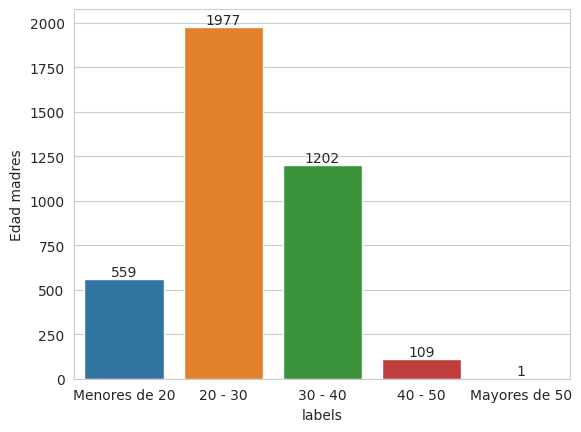

In [133]:
ax = sns.barplot(edadesDF, y='Edad madres', x='labels', estimator="sum", errorbar=None)
ax.bar_label(ax.containers[0], fontsize=10);

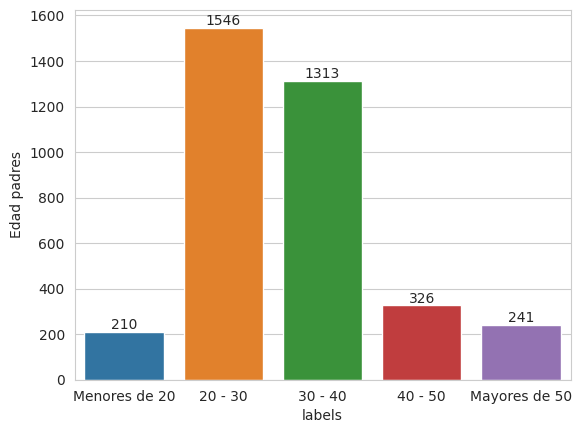

In [134]:
ax = sns.barplot(edadesDF, y='Edad padres', x='labels', estimator="sum", errorbar=None)
ax.bar_label(ax.containers[0], fontsize=10);

# Numero de embarazos
Primigesta (1 embarazo)
Multigesta (2 a 5 embarazos)
Gran multigesta (6 o más embarazos)

In [135]:
etiqueta = 'NUMEROEMBARAZOS'
numero_embarazos = [
    len(mc_df[
        mc_df[etiqueta] == 1
    ]),
    len(mc_df[
        (mc_df[etiqueta] >= 2) & (mc_df[etiqueta] < 6)
    ]),

    len(mc_df[
        mc_df[etiqueta] >= 6
    ])
]
numero_embarazos

[1312, 2462, 74]

#Hijos nacidos muertos
Sí o no

In [136]:
etiqueta = 'HIJOSNACIDOSMUERTOS'
hijos_nacidos_muertos = [
    len(mc_df[
        mc_df[etiqueta] >= 1 # un hijo o mas
    ]),
    len(mc_df[
        mc_df[etiqueta] == 0 # ningun hijo
    ])
]
hijos_nacidos_muertos

[757, 3091]

# Madre sobrevivio parto SOBREVIVIOPARTO
* Si
* No
ver descriptores

#Madre recibio atencion prenatal
Sí o no

In [137]:
etiqueta = 'ATENCIONPRENATAL'
hijos_nacidos_muertos = [
    len(mc_df[
        mc_df[etiqueta] == 1
    ]),
    len(mc_df[
        mc_df[etiqueta] == 2
    ])
]
hijos_nacidos_muertos


[3745, 88]

#Trimestre de primer consulta
Trimestre 1
Trimestre 2
Trimestre 3

In [138]:
etiqueta = 'TRIMESTREPRIMERCONSULTA'
trimestre_primer_consulta = [
    len(mc_df[
        mc_df[etiqueta] == 1
    ]),
    len(mc_df[
        mc_df[etiqueta] == 2
    ]),
    len(mc_df[
        mc_df[etiqueta] == 3
    ])
]
trimestre_primer_consulta

[2912, 676, 102]

# Total de consulta durante el embarazo
Suficiente (5 o mas citas)
Insuficiente (1-4 citas)
No recibió (0 citas)

In [139]:
etiqueta = 'TOTALCONSULTAS'
total_consultas_durante_embarazo = [
    len(mc_df[
        mc_df[etiqueta] == 0
    ]),
    len(mc_df[
        (mc_df[etiqueta] >= 1) & (mc_df[etiqueta] < 5)
    ]),

    len(mc_df[
        mc_df[etiqueta] >= 5
    ])
]
total_consultas_durante_embarazo

[89, 438, 3302]

# Numeros de consultas durante el embarazo
0
1
2
3
4
5
Más de 5

In [140]:
etiqueta = 'TOTALCONSULTAS'
total_consultas_durante_embarazo = [
    len(mc_df[
        mc_df[etiqueta] == 0
    ]),
    len(mc_df[
        mc_df[etiqueta] == 1
    ]),
    len(mc_df[
        mc_df[etiqueta] == 2
    ]),
    len(mc_df[
        mc_df[etiqueta] == 3
    ]),
    len(mc_df[
        mc_df[etiqueta] == 4
    ]),
    len(mc_df[
        mc_df[etiqueta] == 5
    ]),
    len(mc_df[
        mc_df[etiqueta] > 5
    ])
]
total_consultas_durante_embarazo

[89, 38, 67, 132, 201, 363, 2939]

#Escolaridad materna
Ninguno (0, 1, 32, 88, 99)
Primaria completa (31, 52, 112)
Secundaria completa (51, 72)
Bachillerato o preparatoria completa (71, 82)
Licenciatura completa (81, 102)
Posgrado (101)
Tecnico terminal (111, 131, 132)


In [141]:
etiqueta = 'ESCOLARIDAD'
ninguno = [0, 1, 32, 88, 99]
primaria_completa = [31, 52, 112]
secundaria_completa = [51, 72]
bachiller = [71, 82]
licenciatura = [81, 102]
posgrado = [101]
tecnico = [111, 131, 132]
escolaridad_materna = [
    len(
        mc_df[mc_df[etiqueta].isin(ninguno)]
    ),
    len(
        mc_df[mc_df[etiqueta].isin(primaria_completa)]
    ),
    len(
        mc_df[mc_df[etiqueta].isin(secundaria_completa)]
    ),
    len(
        mc_df[mc_df[etiqueta].isin(bachiller)]
    ),
    len(
        mc_df[mc_df[etiqueta].isin(licenciatura)]
    ),
    len(
        mc_df[mc_df[etiqueta].isin(posgrado)]
    ),
    len(
        mc_df[mc_df[etiqueta].isin(tecnico)]
    )
]

escolaridad_materna

[146, 480, 1471, 1015, 615, 54, 67]

# Entidad federativa de parto ENTIDADFEDERATIVAPARTO
df.agg(['count', 'size', 'nunique'])


In [142]:
tmp = mc_df.groupby('ENTIDADFEDERATIVAPARTO').agg(['count', 'size', 'nunique']).stack()

# Sexo del recien nacido SEXO
* Hombre 1
* mujer 2
* no especificado 0,9

In [143]:
etiqueta = 'SEXO'
sexo_mc_df = [
    len(mc_df[
        mc_df[etiqueta] == 1
    ]),
    len(mc_df[
        mc_df[etiqueta] == 2
    ]),
    len(mc_df[
        (mc_df[etiqueta] == 0) | (mc_df[etiqueta] == 9)
    ])
]
sexo_mc_df

[2097, 1746, 5]

# Edad gestacional EDADGESTACIONAL
* pretermino =<36 semanas
* termino 37-41 semanas
* postermino =>42 semanas

In [144]:
etiqueta = 'EDADGESTACIONAL'
edad_gestacional_mc_df = [
    len(mc_df[
        mc_df[etiqueta] <= 36
    ]),
    len(mc_df[
        (mc_df[etiqueta] > 36) & (mc_df[etiqueta] < 42)
    ]),
    len(mc_df[
        (mc_df[etiqueta] >= 42)
    ])
]
edad_gestacional_mc_df

[559, 3263, 26]

# Peso del recien nacido PESO
* bajo peso =<2499gr
* normopeso 2500-3999gr
* macrosomico =>4000 gr

In [145]:
etiqueta = 'PESO'
peso_mc_df = [
    len(mc_df[
        mc_df[etiqueta] < 2500
    ]),
    len(mc_df[
        (mc_df[etiqueta] >= 2500) & (mc_df[etiqueta] < 4000)
    ]),
    len(mc_df[
        (mc_df[etiqueta] >= 4000)
    ])
]
peso_mc_df

[452, 2986, 410]

# Talla del recien nacido TALLA
* segun formula OMS luego averiguamos

# Puntaje escala APGAR a los 5 minutos de recien nacido con MCF APGAR
* Normal 7-10 puntos
* Depresion moderada 4-6 puntos
* Depresion severa 0-3 puntos

In [146]:
etiqueta = 'APGAR'
apgar_mc_df = [
    len(mc_df[
        (mc_df[etiqueta] >= 7) & (mc_df[etiqueta] <= 10)
    ]),
    len(mc_df[
        (mc_df[etiqueta] >= 4) & (mc_df[etiqueta] <= 6)
    ]),
    len(mc_df[
        (mc_df[etiqueta] >= 0) & (mc_df[etiqueta] <= 3)
    ])
]
apgar_mc_df

[3731, 58, 49]

# Puntaje escala APGAR a los 5 minutos de poblacion sana APGAR
los sanos son los que no tienen nada o 0000 en anomalia 1 o 2
* Normal 7-10 puntos
* Depresion moderada 4-6 puntos
* Depresion severa 0-3 puntos

In [147]:
etiqueta = 'APGAR'
apgar_nmc_df = [
    len(nmc_df[
        (nmc_df[etiqueta] >= 7) & (nmc_df[etiqueta] <= 10)
    ]),
    len(nmc_df[
        (nmc_df[etiqueta] >= 4) & (nmc_df[etiqueta] <= 6)
    ]),
    len(nmc_df[
        (nmc_df[etiqueta] >= 0) & (nmc_df[etiqueta] <= 3)
    ])
]
apgar_nmc_df

[1523083, 5198, 10773]

# Puntaje escala Silverman Anderson en recien nacidos con MCF SILVERMAN
* sin dificultad respiratoria
* dificultad respiratoria leve 1-3 puntos
* dificultad respiratoria moderada 4-6 puntos
* dificultad respiratoria severa 7-10 puntos

In [148]:
etiqueta = 'SILVERMAN'
silverman_mc_df = [
    len(mc_df[
        (mc_df[etiqueta] == 0)
    ]),
    len(mc_df[
        (mc_df[etiqueta] >= 1) & (mc_df[etiqueta] <= 3)
    ]),
    len(mc_df[
        (mc_df[etiqueta] >= 4) & (mc_df[etiqueta] <= 6)
    ]),
    len(mc_df[
        (mc_df[etiqueta] >= 7) & (mc_df[etiqueta] <= 10)
    ])
]
silverman_mc_df

[3025, 716, 62, 32]

# Puntaje escala Silverman Anderson de poblacion sana SILVERMAN
los sanos son los que no tienen nada o 0000 en anomalia 1 o 2
* sin dificultad respiratoria
* dificultad respiratoria leve 1-3 puntos
* dificultad respiratoria moderada 4-6 puntos
* dificultad respiratoria severa 7-10 puntos


In [149]:
etiqueta = 'SILVERMAN'
silverman_nmc_df = [
    len(nmc_df[
        (nmc_df[etiqueta] == 0)
    ]),
    len(nmc_df[
        (nmc_df[etiqueta] >= 1) & (nmc_df[etiqueta] <= 3)
    ]),
    len(nmc_df[
        (nmc_df[etiqueta] >= 4) & (nmc_df[etiqueta] <= 6)
    ]),
    len(nmc_df[
        (nmc_df[etiqueta] >= 7) & (nmc_df[etiqueta] <= 10)
    ])
]
silverman_nmc_df

[1370957, 142410, 6835, 18514]

# Tipo de producto embarazo PRODUCTOEMBARAZO
* unico 1
* multiple 2, 3
* no especificado 0

In [150]:
etiqueta = 'PRODUCTOEMBARAZO'
producto_embarazo_mc_df = [
    len(mc_df[
        (mc_df[etiqueta] == 1)
    ]),
    len(mc_df[
        (mc_df[etiqueta] == 2) | (mc_df[etiqueta] == 3)
    ]),
    len(mc_df[
        (mc_df[etiqueta] == 0)
    ])
]
producto_embarazo_mc_df

[3765, 79, 4]

# Total productos extraidos
* 1
* 2
* 3
* 4 o mas

ver descriptores


# Procedimiento utilizado para resolucion del embarazo RESOLUCIONEMBARAZO
* no especificado 0
* eutocico 1
* distocico 2
* cesarea 3
* otro 8

In [151]:
etiqueta = 'RESOLUCIONEMBARAZO'
resolucion_embarazo_mc_df = [
    len(mc_df[
        (mc_df[etiqueta] == 0)
    ]),
    len(mc_df[
        (mc_df[etiqueta] == 1)
    ]),
    len(mc_df[
        (mc_df[etiqueta] == 2)
    ]),
    len(mc_df[
        (mc_df[etiqueta] == 3)
    ]),
    len(mc_df[
        (mc_df[etiqueta] == 8)
    ])
]
resolucion_embarazo_mc_df

[23, 1506, 39, 2280, 0]

# Utilizo forceps UTILIZO FORCEPS
* no especificado, otro, no aplica, se ignora 0, 3, 8, 9
* si 1
* no 2

In [152]:
etiqueta = 'UTILIZOFORCEPS'
no_aplica = [0, 3, 8, 9]
utilizo_forceps_mc_df = [
    len(mc_df[
        (mc_df[etiqueta].isin(no_aplica))
    ]),
    len(mc_df[
        (mc_df[etiqueta] == 1)
    ]),
    len(mc_df[
        (mc_df[etiqueta] == 2)
    ])
]
utilizo_forceps_mc_df

[3789, 20, 39]

In [153]:
df.max()

EDAD                        999
NUMEROEMBARAZOS              99
HIJOSNACIDOSMUERTOS          99
ATENCIONPRENATAL              9
TRIMESTREPRIMERCONSULTA       9
TOTALCONSULTAS             99.0
SOBREVIVIOPARTO               9
ESCOLARIDAD                 132
EDADPADRE                  99.0
SEXO                          9
EDADGESTACIONAL              99
TALLA                        99
PESO                       9999
APGAR                        99
SILVERMAN                    99
PRODUCTOEMBARAZO              3
TOTALPRODUCTOS              5.0
CODIGOCIEANOMALIA1         Z208
CODIGOCIEANOMALIA2         Z208
RESOLUCIONEMBARAZO            8
UTILIZOFORCEPS                9
ENTIDADFEDERATIVAPARTO       32
dtype: object

# medidas descriptivas

In [154]:
mc_df.describe().applymap('{:,.2f}'.format)

,EDAD,NUMEROEMBARAZOS,HIJOSNACIDOSMUERTOS,ATENCIONPRENATAL,TRIMESTREPRIMERCONSULTA,TOTALCONSULTAS,SOBREVIVIOPARTO,ESCOLARIDAD,EDADPADRE,SEXO,EDADGESTACIONAL,TALLA,PESO,APGAR,SILVERMAN,PRODUCTOEMBARAZO,TOTALPRODUCTOS,RESOLUCIONEMBARAZO,UTILIZOFORCEPS,ENTIDADFEDERATIVAPARTO
count,"3,848.00","3,848.00","3,848.00","3,848.00","3,848.00","3,829.00","3,848.00","3,848.00","3,636.00","3,848.00","3,848.00","3,848.00","3,848.00","3,848.00","3,848.00","3,848.00",74.00,"3,848.00","3,848.00","3,848.00"
mean,26.77,2.24,0.26,1.05,1.34,8.14,1.00,62.37,33.45,1.45,38.15,48.80,"3,609.54",8.97,0.79,1.02,2.05,2.19,7.90,16.57
std,6.53,1.27,0.59,0.49,1.10,7.29,0.02,19.60,16.74,0.50,2.73,3.81,"2,034.67",4.72,5.84,0.16,0.23,0.99,0.81,8.24
min,12.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,15.00,0.00,18.00,20.00,495.00,0.00,0.00,0.00,2.00,0.00,0.00,1.00
25%,22.00,1.00,0.00,1.00,1.00,6.00,1.00,51.00,24.00,1.00,37.00,48.00,"2,765.00",9.00,0.00,1.00,2.00,1.00,8.00,10.00
50%,26.00,2.00,0.00,1.00,1.00,8.00,1.00,71.00,30.00,1.00,39.00,49.00,"3,095.00",9.00,0.00,1.00,2.00,3.00,8.00,15.00
75%,31.00,3.00,0.00,1.00,1.00,9.00,1.00,72.00,36.00,2.00,40.00,51.00,"3,465.75",9.00,0.00,1.00,2.00,3.00,8.00,22.00
max,50.00,12.00,7.00,9.00,9.00,99.00,1.00,132.00,99.00,2.00,99.00,99.00,"9,999.00",99.00,99.00,3.00,3.00,3.00,8.00,32.00


In [155]:
mc_df.mode(numeric_only=True)

,EDAD,NUMEROEMBARAZOS,HIJOSNACIDOSMUERTOS,ATENCIONPRENATAL,TRIMESTREPRIMERCONSULTA,TOTALCONSULTAS,SOBREVIVIOPARTO,ESCOLARIDAD,EDADPADRE,SEXO,EDADGESTACIONAL,TALLA,PESO,APGAR,SILVERMAN,PRODUCTOEMBARAZO,TOTALPRODUCTOS,RESOLUCIONEMBARAZO,UTILIZOFORCEPS,ENTIDADFEDERATIVAPARTO
0,28,1,0,1,1,8.0,1,51,28.0,1,39,50,9999,9,0,1,2.0,3,8,15


## Agrupando por edades

In [156]:
edades = [
    len(df[df['EDAD'] < 20]),
    len(df[(df['EDAD'] >= 20) & (df['EDAD'] < 30)]),
    len(df[(df['EDAD'] >= 30) & (df['EDAD'] < 40)]),
    len(df[(df['EDAD'] >= 40) & (df['EDAD'] < 50)]),
    len(df[df['EDAD'] >= 50])
]
labels = [
    "Menores de 20",
    "20 - 30",
    "30 - 40",
    "40 - 50",
    "Mayores de 50"]

edadesDF = pd.DataFrame({'edades': edades, 'labels': labels},
                  index=labels)

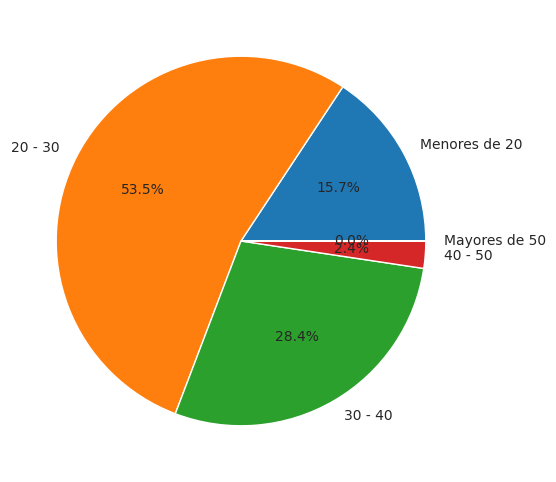

In [157]:
sns.set_style("whitegrid")
plt.figure(figsize=(6,6))
plt.pie(edadesDF['edades'], labels=edadesDF['labels'], autopct='%1.1f%%')
plt.show()

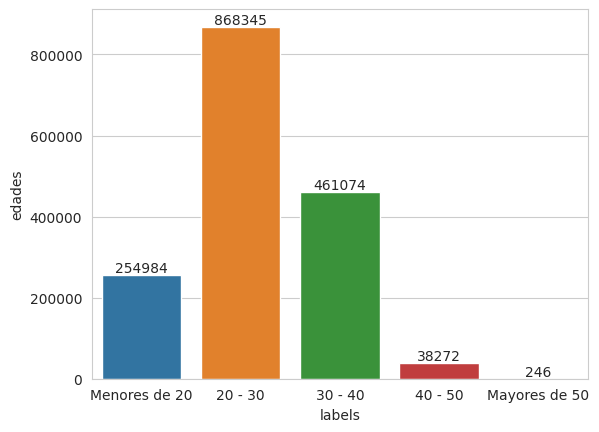

In [158]:
ax = sns.barplot(edadesDF, y='edades', x='labels', estimator="sum", errorbar=None)
ax.bar_label(ax.containers[0], fontsize=10);